Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withoot using pytorch builtin layer functionality 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.optim as optim
from typing import Callable

# Initializations

### Generate non-linear data

In [2]:
n_samples = 600
input_dim = 3
input = torch.FloatTensor(n_samples, input_dim).uniform_(-1,1)

### Initialize weights and bias

In [3]:
weights_true = torch.FloatTensor([[2.0, -6.0, 8.0]]).T
bias_true = torch.tensor([0.5, 0.25])
y_true = (torch.einsum('ij, jk -> ik', (input**3),  weights_true) + torch.einsum('ij, jk -> ik', (input**2),  weights_true) + torch.einsum('ij, jk -> ik', input, weights_true) + bias_true).float()


x_tensor = input.clone().detach().requires_grad_(True).float()
y_true_tensor = y_true.clone().detach().requires_grad_(True).float()

print(f'x: {x_tensor.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true_tensor.shape}')

x: torch.Size([600, 3]), weights: torch.Size([3, 1]), bias: torch.Size([2]), y: torch.Size([600, 2])


### Hyperparameter initializations

In [4]:
output_dim = 1
num_hidden = 10

alpha = 0.01
epochs = 1000



In [5]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(input)
view.shape

(600, 2)

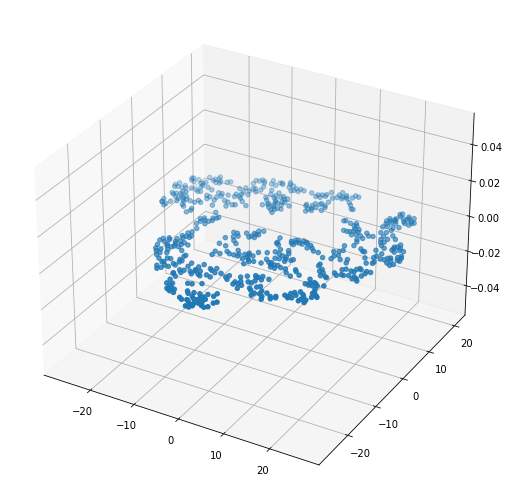

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(15,9))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size, num_hidden):
        super(NeuralNet, self).__init__()

        # Initialize learnable parameters
        self.weight1 = nn.Parameter(torch.randn(input_size, num_hidden), requires_grad=True)
        self.bias1 = nn.Parameter(torch.zeros(num_hidden), requires_grad=True)
        self.weight2 = nn.Parameter(torch.randn(num_hidden, num_hidden), requires_grad=True)
        self.bias2 = nn.Parameter(torch.zeros(num_hidden), requires_grad=True)
        self.weight3 = nn.Parameter(torch.randn(num_hidden, output_size), requires_grad=True)
        self.bias3 = nn.Parameter(torch.zeros(output_size), requires_grad=True)

        # Initialize activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Perform linear transformations and apply activation function
        out = self.relu(torch.matmul(x, self.weight1) + self.bias1)
        out = self.relu(torch.matmul(out, self.weight2) + self.bias2)
        out = torch.matmul(out, self.weight3) + self.bias3
        return out

In [8]:
model = NeuralNet(input_dim, output_dim, num_hidden)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=alpha)

In [9]:
loss_ = []
for epoch in range(epochs):
  optimizer.zero_grad()
  y_pred = model(input)
  loss_value = loss(y_pred, y_true)
  print(f'Epoch {epoch}, loss {loss_value}')
  loss_value.backward()
  optimizer.step()
  loss_.append(loss_value.detach().numpy())

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([600, 2])) that is different to the input size (torch.Size([600, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss 117.57369995117188
Epoch 1, loss 107.75816345214844
Epoch 2, loss 98.68034362792969
Epoch 3, loss 90.30514526367188
Epoch 4, loss 82.60957336425781
Epoch 5, loss 75.61128234863281
Epoch 6, loss 69.2436752319336
Epoch 7, loss 63.44089889526367
Epoch 8, loss 58.22306823730469
Epoch 9, loss 53.52384567260742
Epoch 10, loss 49.30319595336914
Epoch 11, loss 45.50315475463867
Epoch 12, loss 42.065025329589844
Epoch 13, loss 38.96754455566406
Epoch 14, loss 36.171810150146484
Epoch 15, loss 33.64021301269531
Epoch 16, loss 31.33971405029297
Epoch 17, loss 29.236236572265625
Epoch 18, loss 27.303468704223633
Epoch 19, loss 25.520158767700195
Epoch 20, loss 23.877870559692383
Epoch 21, loss 22.377971649169922
Epoch 22, loss 21.0068302154541
Epoch 23, loss 19.753141403198242
Epoch 24, loss 18.61338233947754
Epoch 25, loss 17.584270477294922
Epoch 26, loss 16.660043716430664
Epoch 27, loss 15.832099914550781
Epoch 28, loss 15.097209930419922
Epoch 29, loss 14.45357608795166
Epoch 30

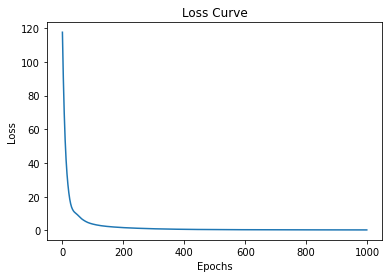

In [10]:
plt.plot(range(epochs), loss_)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [11]:
model = NeuralNet(input_dim, output_dim, num_hidden)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=alpha)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred = model(input)
#y_pred = y_pred.reshape(y_true.shape)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(input)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(97.4766, grad_fn=<MseLossBackward0>)
tensor(93.3749, grad_fn=<MseLossBackward0>)


In [ ]:
# Plot the 3D plot with the true and predicted values as separate plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input, y_true, 0, c='r', label='True Function')
ax.scatter(input, y_pred, 0, c='b', label='Predicted Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [19]:
def tsne_plot(view, y, y_pred=None):
  fig = plt.figure()
  tsne = fig.add_subplot(111, projection='3d')
  tsne.scatter(view[:, 0], view[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    tsne.scatter(view[:, 0], view[:, 1], y_pred[:, 0], label='our function')
  plt.legend()

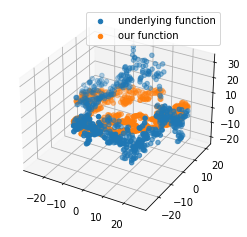

In [20]:
tsne_plot(view, y_true, model(x_tensor).detach())